<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-modules" data-toc-modified-id="Load-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load modules</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Check-files" data-toc-modified-id="Check-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check files</a></span></li><li><span><a href="#Read-all-files" data-toc-modified-id="Read-all-files-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read all files</a></span></li><li><span><a href="#Check-stats-for-different-types" data-toc-modified-id="Check-stats-for-different-types-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check stats for different types</a></span></li><li><span><a href="#Train-test-split-of-files-by-type" data-toc-modified-id="Train-test-split-of-files-by-type-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train test split of files by type</a></span></li></ul></li><li><span><a href="#Features-generation-and-a-baseline-model" data-toc-modified-id="Features-generation-and-a-baseline-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Features generation and a baseline model</a></span><ul class="toc-item"><li><span><a href="#Manual-generation" data-toc-modified-id="Manual-generation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Manual generation</a></span></li><li><span><a href="#Fit-RF-classifier-with-using-30*3-measurements-as-features" data-toc-modified-id="Fit-RF-classifier-with-using-30*3-measurements-as-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fit RF classifier with using 30*3 measurements as features</a></span></li><li><span><a href="#Build-features-with-TSFresh-library" data-toc-modified-id="Build-features-with-TSFresh-library-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Build features with TSFresh library</a></span></li><li><span><a href="#Filter-features-based-on-X_train" data-toc-modified-id="Filter-features-based-on-X_train-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Filter features based on X_train</a></span></li><li><span><a href="#Check-filtered-features-on-Random-Forest-baseline-model" data-toc-modified-id="Check-filtered-features-on-Random-Forest-baseline-model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Check filtered features on Random Forest baseline model</a></span></li><li><span><a href="#Understanding-issue-with-prediction-stairs-class-on-TSNE-projection" data-toc-modified-id="Understanding-issue-with-prediction-stairs-class-on-TSNE-projection-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Understanding issue with prediction <strong>stairs</strong> class on TSNE projection</a></span><ul class="toc-item"><li><span><a href="#2D-projection" data-toc-modified-id="2D-projection-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>2D projection</a></span></li><li><span><a href="#3D-projection" data-toc-modified-id="3D-projection-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>3D projection</a></span></li></ul></li></ul></li><li><span><a href="#Fit-and-tune-XGBoost-model" data-toc-modified-id="Fit-and-tune-XGBoost-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fit and tune XGBoost model</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Validation-results" data-toc-modified-id="Validation-results-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Validation results</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Next-steps" data-toc-modified-id="Next-steps-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Next steps</a></span></li></ul></li></ul></div>

# Load modules

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import pickle
from IPython.core.display import display, HTML
from tqdm.notebook import tqdm
import glob

from matplotlib import pylab as plt
%matplotlib inline

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 500)
pd.set_option("display.max_columns", 200)

In [2]:
np.random.seed(2018) 

In [3]:
# !unzip data.zip

# Load data

## Check files

Let's check amount of files per type.

In [4]:
file_list = pd.DataFrame({'path':glob.glob('data/**/*.csv')}).sample(frac=1).reset_index(drop=True)
file_list['type'] = file_list['path'].str.split('/').apply(lambda x: x[1])
file_list['id'] = file_list['path'].apply(lambda x: x.split('/')[-1].split('.')[0])

file_list.groupby('type').size().reset_index(name='amount')

,type,amount
0,idle,1039
1,running,3408
2,stairs,165
3,walking,1850


In [5]:
file_list.head()

,path,type,id
0,data/walking/walking-1422.csv,walking,walking-1422
1,data/walking/walking-1742.csv,walking,walking-1742
2,data/idle/idle-680.csv,idle,idle-680
3,data/running/running-1928.csv,running,running-1928
4,data/walking/walking-562.csv,walking,walking-562


In [6]:
files_stats = file_list.groupby('type').size().reset_index(name='amount')
files_stats['amount'] = files_stats['amount'].div(files_stats['amount'].sum() * 0.01).round(2)

files_stats

,type,amount
0,idle,16.08
1,running,52.74
2,stairs,2.55
3,walking,28.63


In [7]:
np.unique([pd.read_csv(arg).shape for arg in file_list['path']])

array([ 3, 30])

**We have unbalanced classes with static window (30 measurements) for each event**

Assumptions:

1. All measurements was made with constant frequency.
1. All measurements was made with one equipment in one ranges.

## Read all files

In [8]:
data_list = []

for arg in tqdm(file_list.values):
    temp = pd.read_csv(arg[0])
    
    assert len(temp) == 30
    
    temp['id'] = arg[2]
    temp['time'] = np.arange(30)
    temp['type'] = arg[1]
    
    data_list.append(temp)

In [9]:
data_df = pd.concat(data_list, axis=0, sort=False)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193860 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   id               193860 non-null  object 
 4   time             193860 non-null  int64  
 5   type             193860 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.4+ MB


In [10]:
class_int_dict = {arg:num for num, arg in enumerate(sorted(data_df['type'].unique()))}
class_int_dict

{'idle': 0, 'running': 1, 'stairs': 2, 'walking': 3}

## Check stats for different types

In [11]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
accelerometer_X,193860.0,1.923550,8.404867,-39.188293,-2.494758,0.248997,4.668694,39.188293
accelerometer_Y,193860.0,1.598343,12.474041,-39.188293,-8.327033,-0.009577,8.671799,39.188293
accelerometer_Z,193860.0,1.804896,7.191590,-39.188293,-2.494758,0.905008,7.187394,39.188293
time,193860.0,14.500000,8.655464,0.000000,7.000000,14.500000,22.000000,29.000000


In [12]:
data_df.groupby('type').describe().T

type                           idle        running       stairs       walking
accelerometer_X count  31170.000000  102240.000000  4950.000000  55500.000000
                mean       0.096767       5.045705     0.353135     -2.661943
                std        0.691892       9.952696     3.845949      4.648378
                min      -10.448297     -39.188293   -11.238382    -26.815060
                25%       -0.110133      -1.532289    -1.857900     -4.855441
                50%        0.234632       3.605668     0.483629     -2.298433
                75%        0.277727       9.595961     2.600103     -0.229843
                max        8.135497      39.188293    14.164097     20.575770
accelerometer_Y count  31170.000000  102240.000000  4950.000000  55500.000000
                mean       2.225971       8.083135    -9.574353     -9.703702
                std        2.821235      12.441402     4.922294      5.931165
                min       -2.595315     -39.188293   -25.828648    -39.188293
                25%       -0.028730      -0.742202   -12.253524    -13.369223
                50%        0.028730       7.967903    -8.944737     -9.974244
                75%        5.310340      16.385916    -6.301539     -6.540959
                max        9.916783      39.188293     4.994305     14.441825
accelerometer_Z count  31170.000000  102240.000000  4950.000000  55500.000000
                mean       8.973247       1.387356    -1.841333     -1.126623
                std        1.211058       7.004236     5.297376      6.927679
                min       -0.296881     -39.188293   -38.086960    -39.169140
                25%        8.116344      -2.873042    -3.797204     -3.428497
                50%        9.749189       0.407014    -1.589750     -0.933739
                75%        9.773131       4.769250     0.292093      1.561020
                max       21.988348      39.188293    17.492037     38.426937
time            count  31170.000000  102240.000000  4950.000000  55500.000000
                mean      14.500000      14.500000    14.500000     14.500000
                std        8.655580       8.655484     8.656316      8.655519
                min        0.000000       0.000000     0.000000      0.000000
                25%        7.000000       7.000000     7.000000      7.000000
                50%       14.500000      14.500000    14.500000     14.500000
                75%       22.000000      22.000000    22.000000     22.000000
                max       29.000000      29.000000    29.000000     29.000000

In [13]:
data_df.columns

Index(['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'id', 'time',
       'type'],
      dtype='object')

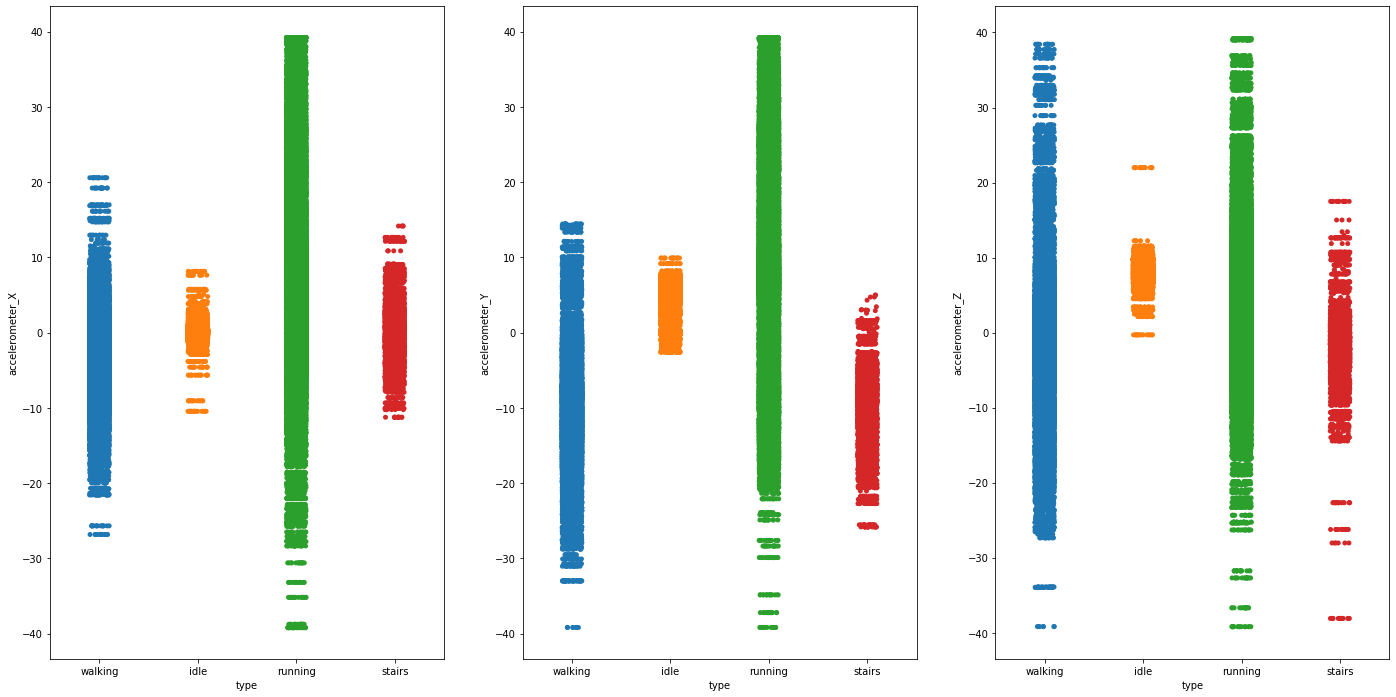

In [14]:
import seaborn as sns

fig=plt.figure(figsize=(24,12))
ax1=fig.add_subplot(131)
ax1=sns.stripplot(x='type',y='accelerometer_X',data=data_df,jitter=True)

ax2=fig.add_subplot(132)
ax2=sns.stripplot(x='type',y='accelerometer_Y',data=data_df,jitter=True)

ax3=fig.add_subplot(133)
ax3=sns.stripplot(x='type',y='accelerometer_Z',data=data_df,jitter=True)

plt.show()

**Conclutions:**

1. In data presented outliers
2. Data without NA's
3. We have difference more in std, and verity terms

## Train test split of files by type

In [15]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

train_ids, test_ids = train_test_split(file_list, test_size=0.1, stratify=file_list['type'], random_state=2018)

len(train_ids), len(test_ids)

(5815, 647)

In [18]:
train_ids.columns, data_df.columns

(Index(['path', 'type', 'id'], dtype='object'),
 Index(['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'id', 'time',
        'type'],
       dtype='object'))

In [17]:
# X_train = data_df[data_df['id'].isin(train_ids['id'])].sort_values(["id", "time"]).drop(['type', 'id', 'time'], axis=1).copy()
# y_train = data_df[data_df['id'].isin(train_ids['id'])].sort_values(["id", "time"])['type'].values

# X_test = data_df[data_df['id'].isin(test_ids['id'])].sort_values(["id", "time"]).drop(['type', 'id', 'time'], axis=1).copy()
# y_test = data_df[data_df['id'].isin(test_ids['id'])].sort_values(["id", "time"])['type'].values

# X_train.shape, X_test.shape

# Features generation and a baseline model

## Manual generation

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [32]:
features_columns = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']

data_manual = pd.concat([data_df.groupby('id')[features_columns].apply(lambda x: x.abs().sum()
                            ).rename(columns={arg:'__'.join([arg, 'abs_sum']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.sum()
                            ).rename(columns={arg:'__'.join([arg, 'sum']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.mean()
                            ).rename(columns={arg:'__'.join([arg, 'mean']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.std()
                            ).rename(columns={arg:'__'.join([arg, 'std']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.max() - x.min()
                            ).rename(columns={arg:'__'.join([arg, 'delta']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.abs().max() - x.abs().min()
                            ).rename(columns={arg:'__'.join([arg, 'abs_delta']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.abs().std()
                            ).rename(columns={arg:'__'.join([arg, 'abs_std']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.sum()
                            ).rename(columns={arg:'__'.join([arg, 'sum']) for arg in features_columns}
                            ),
           data_df.groupby('id')[features_columns].apply(lambda x: x.abs().mean()
                            ).rename(columns={arg:'__'.join([arg, 'abs_mean']) for arg in features_columns}
                            ),
          ], axis=1)

data_manual.head()

,accelerometer_X__abs_sum,accelerometer_Y__abs_sum,accelerometer_Z__abs_sum,accelerometer_X__sum,accelerometer_Y__sum,accelerometer_Z__sum,accelerometer_X__mean,accelerometer_Y__mean,accelerometer_Z__mean,accelerometer_X__std,accelerometer_Y__std,accelerometer_Z__std,accelerometer_X__delta,accelerometer_Y__delta,accelerometer_Z__delta,accelerometer_X__abs_delta,accelerometer_Y__abs_delta,accelerometer_Z__abs_delta,accelerometer_X__abs_std,accelerometer_Y__abs_std,accelerometer_Z__abs_std,accelerometer_X__sum,accelerometer_Y__sum,accelerometer_Z__sum,accelerometer_X__abs_mean,accelerometer_Y__abs_mean,accelerometer_Z__abs_mean
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
idle-1,12.919112,12.971786,288.170907,5.353436,5.023036,288.170907,0.178448,0.167435,9.605697,1.036361,1.157603,0.406903,6.009447,4.898537,1.388636,5.061343,4.592079,1.388636,0.956631,1.084268,0.406903,5.353436,5.023036,288.170907,0.430637,0.432393,9.605697
idle-10,4.098872,3.983948,293.136481,-2.959232,-3.936064,293.136481,-0.098641,-0.131202,9.771216,0.125848,0.048059,0.025419,0.727837,0.268151,0.138863,0.392649,0.220267,0.138863,0.081191,0.043287,0.025419,-2.959232,-3.936064,293.136481,0.136629,0.132798,9.771216
idle-100,2.997536,6.627154,293.055080,-2.997536,6.627154,293.055080,-0.099918,0.220905,9.768503,0.015642,0.016383,0.014528,0.062249,0.067038,0.052672,0.062249,0.067038,0.052672,0.015642,0.016383,0.014528,-2.997536,6.627154,293.055080,0.099918,0.220905,9.768503
idle-1000,12.028470,1.374272,292.576237,12.028470,-0.885854,292.576237,0.400949,-0.029528,9.752541,0.052889,0.054525,0.017967,0.292092,0.292092,0.071826,0.292092,0.196324,0.071826,0.052889,0.041281,0.017967,12.028470,-0.885854,292.576237,0.400949,0.045809,9.752541
idle-1001,12.028470,1.302446,292.609756,12.028470,-0.814028,292.609756,0.400949,-0.027134,9.753659,0.053187,0.054004,0.018902,0.292092,0.292092,0.071826,0.292092,0.201113,0.071826,0.053187,0.041572,0.018902,12.028470,-0.814028,292.609756,0.400949,0.043415,9.753659


In [37]:
X_train_manual = data_manual[data_manual.index.isin(train_ids['id'])].copy()
y_train = data_manual[data_manual.index.isin(train_ids['id'])].index.map(lambda x: x.split('-')[0]).values

X_test_manual = data_manual[data_manual.index.isin(test_ids['id'])].copy()
y_test = data_manual[data_manual.index.isin(test_ids['id'])].index.map(lambda x: x.split('-')[0]).values

X_train_manual.shape, X_test_manual.shape, len(y_train), len(y_test)

((5815, 27), (647, 27), 5815, 647)

In [40]:
preds_cv = cross_val_predict(RandomForestClassifier(class_weight='balanced', n_jobs=-1), 
                             X_train_manual, y_train, groups=y_train, cv=5, verbose=1)

print(classification_report(y_train, preds_cv, digits=4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        idle     0.9926    1.0000    0.9963       935
     running     1.0000    0.9977    0.9989      3067
      stairs     0.7391    0.4595    0.5667       148
     walking     0.9535    0.9856    0.9693      1665

    accuracy                         0.9809      5815
   macro avg     0.9213    0.8607    0.8828      5815
weighted avg     0.9789    0.9809    0.9790      5815



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


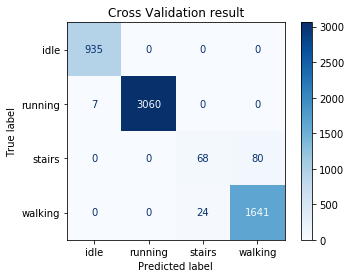

In [41]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_train, preds_cv), display_labels=np.unique(y_train)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Cross Validation result')
plt.show()

In [42]:
classifier_full = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
classifier_full.fit(X_train_manual, y_train)
preds_test = classifier_full.predict(X_test_manual)

print(classification_report(y_test, preds_test, digits=4))

              precision    recall  f1-score   support

        idle     1.0000    1.0000    1.0000       104
     running     1.0000    1.0000    1.0000       341
      stairs     1.0000    0.8824    0.9375        17
     walking     0.9893    1.0000    0.9946       185

    accuracy                         0.9969       647
   macro avg     0.9973    0.9706    0.9830       647
weighted avg     0.9969    0.9969    0.9968       647



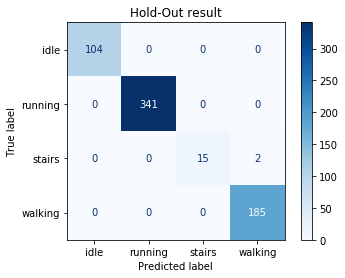

In [43]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_test, preds_test), display_labels=np.unique(y_test)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Hold-Out result')
plt.show()

## Fit RF classifier with using 30*3 measurements as features

In [44]:
simple_features = []

for arg in tqdm(data_list):
    temp = arg.pivot(index='id', columns='time', 
                       values=['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']
                      )
    temp.columns = ['__'.join([arg, str(num)]) for num in range(30)
                            for arg in ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
    temp['type'] = arg.type.unique()[0]
    temp['id'] = arg.id.unique()[0]

    simple_features.append(temp.reset_index(drop=True))
    
simple_features[0]

,accelerometer_X__0,accelerometer_Y__0,accelerometer_Z__0,accelerometer_X__1,accelerometer_Y__1,accelerometer_Z__1,accelerometer_X__2,accelerometer_Y__2,accelerometer_Z__2,accelerometer_X__3,accelerometer_Y__3,accelerometer_Z__3,accelerometer_X__4,accelerometer_Y__4,accelerometer_Z__4,accelerometer_X__5,accelerometer_Y__5,accelerometer_Z__5,accelerometer_X__6,accelerometer_Y__6,accelerometer_Z__6,accelerometer_X__7,accelerometer_Y__7,accelerometer_Z__7,accelerometer_X__8,accelerometer_Y__8,accelerometer_Z__8,accelerometer_X__9,accelerometer_Y__9,accelerometer_Z__9,accelerometer_X__10,accelerometer_Y__10,accelerometer_Z__10,accelerometer_X__11,accelerometer_Y__11,accelerometer_Z__11,accelerometer_X__12,accelerometer_Y__12,accelerometer_Z__12,accelerometer_X__13,accelerometer_Y__13,accelerometer_Z__13,accelerometer_X__14,accelerometer_Y__14,accelerometer_Z__14,accelerometer_X__15,accelerometer_Y__15,accelerometer_Z__15,accelerometer_X__16,accelerometer_Y__16,accelerometer_Z__16,accelerometer_X__17,accelerometer_Y__17,accelerometer_Z__17,accelerometer_X__18,accelerometer_Y__18,accelerometer_Z__18,accelerometer_X__19,accelerometer_Y__19,accelerometer_Z__19,accelerometer_X__20,accelerometer_Y__20,accelerometer_Z__20,accelerometer_X__21,accelerometer_Y__21,accelerometer_Z__21,accelerometer_X__22,accelerometer_Y__22,accelerometer_Z__22,accelerometer_X__23,accelerometer_Y__23,accelerometer_Z__23,accelerometer_X__24,accelerometer_Y__24,accelerometer_Z__24,accelerometer_X__25,accelerometer_Y__25,accelerometer_Z__25,accelerometer_X__26,accelerometer_Y__26,accelerometer_Z__26,accelerometer_X__27,accelerometer_Y__27,accelerometer_Z__27,accelerometer_X__28,accelerometer_Y__28,accelerometer_Z__28,accelerometer_X__29,accelerometer_Y__29,accelerometer_Z__29,type,id
0,-7.398083,-5.39653,-4.582502,-9.873688,-3.936067,-1.733402,-2.925714,0.220267,2.48997,-3.442862,-14.973337,-2.772485,-12.430696,-4.118027,-0.363919,-5.080496,-8.772355,-4.055777,-4.070143,-9.303867,0.790087,-2.916138,-3.174711,-8.020575,-3.260903,-3.931279,-14.45619,1.431733,-2.011129,-1.877054,-13.077129,-9.093178,-14.00608,-13.512875,-12.339716,-5.492298,-7.062895,-9.337387,-22.471977,-12.129025,-6.234501,-13.929465,-9.524135,-8.030152,-3.083732,-8.508993,-13.833697,-8.959103,-12.933477,-14.441825,-12.253524,-2.60968,-9.629479,-14.662091,-3.064578,-14.068329,-15.107412,-12.698846,-1.403002,-9.428367,-1.541866,-0.033519,0.866701,-13.302185,-1.058237,-5.228936,0.110133,3.519477,-3.806781,-1.177947,-11.702858,-0.646434,-12.808979,-0.775721,1.091756,0.248997,-0.823605,0.09098,5.31034,-7.800309,-1.575385,1.675941,-1.94888,-1.527501,37.138855,6.052542,-13.393165,-2.408567,2.097321,-2.499546,walking,walking-1422


In [45]:
simple_df = pd.concat(simple_features, axis=0, sort=False)
simple_df.shape

(6462, 92)

In [46]:
X_train = simple_df[simple_df['id'].isin(train_ids['id'])].drop(['type', 'id'], axis=1).copy()
y_train = simple_df[simple_df['id'].isin(train_ids['id'])]['type'].values

X_test = simple_df[simple_df['id'].isin(test_ids['id'])].drop(['type', 'id'], axis=1).copy()
y_test = simple_df[simple_df['id'].isin(test_ids['id'])]['type'].values

X_train.shape, X_test.shape

((5815, 90), (647, 90))

In [47]:
preds_cv = cross_val_predict(RandomForestClassifier(class_weight='balanced', n_jobs=-1), 
                             X_train, y_train, groups=y_train, cv=5, verbose=1)

print(classification_report(y_train, preds_cv, digits=4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        idle     1.0000    1.0000    1.0000       935
     running     1.0000    1.0000    1.0000      3067
      stairs     0.9167    0.0743    0.1375       148
     walking     0.9239    0.9994    0.9602      1665

    accuracy                         0.9763      5815
   macro avg     0.9601    0.7684    0.7744      5815
weighted avg     0.9761    0.9763    0.9666      5815



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


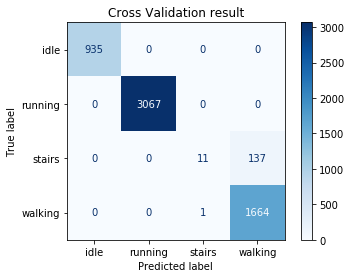

In [48]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_train, preds_cv), display_labels=np.unique(y_train)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Cross Validation result')
plt.show()

In [49]:
classifier_full = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
classifier_full.fit(X_train, y_train)
preds_test = classifier_full.predict(X_test)

print(classification_report(y_test, preds_test, digits=4))

              precision    recall  f1-score   support

        idle     1.0000    1.0000    1.0000       104
     running     1.0000    1.0000    1.0000       341
      stairs     1.0000    0.1176    0.2105        17
     walking     0.9250    1.0000    0.9610       185

    accuracy                         0.9768       647
   macro avg     0.9812    0.7794    0.7929       647
weighted avg     0.9786    0.9768    0.9681       647



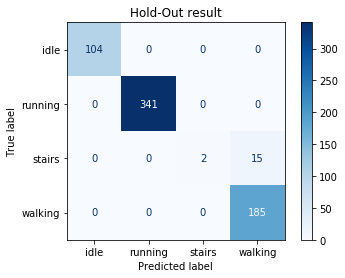

In [50]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_test, preds_test), display_labels=np.unique(y_test)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Hold-Out result')
plt.show()

In [51]:
# check classes in confution matrix
np.unique(y_test, return_counts=True)

(array(['idle', 'running', 'stairs', 'walking'], dtype=object),
 array([104, 341,  17, 185]))

**Conclusions:**

1. We had big issue with __stairs__ class. Model isn't recognize it, and predict as __walking__.

## Build features with TSFresh library

In [52]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute

In [53]:
X_all_gen = extract_features(data_df.sort_values(["id", "time"]).drop(['type'], axis=1).copy(), 
                               column_id="id", 
                               column_sort="time", 
                               impute_function=impute,
                              n_jobs=20)

X_all_gen.shape

Feature Extraction: 100%|██████████| 100/100 [01:26<00:00,  1.15it/s]


(6462, 2289)

In [54]:
X_all_gen['type'] = X_all_gen.index.map(lambda x: x.split('-')[0])

X_all_gen['type'].value_counts()

running    3408
walking    1850
idle       1039
stairs      165
Name: type, dtype: int64

In [55]:
X_train_gen = X_all_gen[X_all_gen.index.isin(train_ids['id'])].drop(['type'], axis=1).copy()
y_train = X_all_gen[X_all_gen.index.isin(train_ids['id'])]['type'].values

X_test_gen = X_all_gen[X_all_gen.index.isin(test_ids['id'])].drop(['type'], axis=1).copy()
y_test = X_all_gen[X_all_gen.index.isin(test_ids['id'])]['type'].values

X_train_gen.shape, X_test_gen.shape, len(y_train), len(y_test)

((5815, 2289), (647, 2289), 5815, 647)

In [56]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array(['idle', 'running', 'stairs', 'walking'], dtype=object),
  array([ 935, 3067,  148, 1665])),
 (array(['idle', 'running', 'stairs', 'walking'], dtype=object),
  array([104, 341,  17, 185])))

## Filter features based on X_train

In [57]:
relevant_features = set()

for label in np.unique(y_train):
    y_train_binary = y_train == label
    X_train_filtered = select_features(X_train_gen, y_train_binary)
    print("Number of relevant features for class {}: {}/{}".format(label, X_train_filtered.shape[1], X_train.shape[1]))
    relevant_features = relevant_features.union(set(X_train_filtered.columns))
    
len(relevant_features)

Number of relevant features for class idle: 758/90
Number of relevant features for class running: 754/90
Number of relevant features for class stairs: 550/90
Number of relevant features for class walking: 740/90


841

In [58]:
X_train_filtered = X_train_gen[list(relevant_features)]
X_test_filtered = X_test_gen[list(relevant_features)]

X_train_filtered.shape, X_test_filtered.shape

((5815, 841), (647, 841))

## Check filtered features on Random Forest baseline model

In [59]:
preds_cv = cross_val_predict(RandomForestClassifier(class_weight='balanced', n_jobs=-1), 
                             X_train_filtered, y_train, groups=y_train, cv=10, verbose=1)

print(classification_report(y_train, preds_cv, digits=4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        idle     0.9989    1.0000    0.9995       935
     running     1.0000    0.9997    0.9998      3067
      stairs     0.9684    0.6216    0.7572       148
     walking     0.9674    0.9982    0.9826      1665

    accuracy                         0.9897      5815
   macro avg     0.9837    0.9049    0.9348      5815
weighted avg     0.9897    0.9897    0.9887      5815



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.8s finished


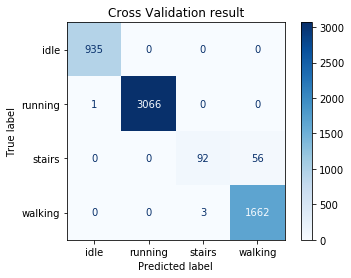

In [60]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_train, preds_cv), display_labels=np.unique(y_train)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Cross Validation result')
plt.show()

In [61]:
classifier_full = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
classifier_full.fit(X_train_filtered, y_train)
preds_test = classifier_full.predict(X_test_filtered)

print(classification_report(y_test, preds_test, digits=4))

              precision    recall  f1-score   support

        idle     1.0000    1.0000    1.0000       104
     running     1.0000    1.0000    1.0000       341
      stairs     1.0000    1.0000    1.0000        17
     walking     1.0000    1.0000    1.0000       185

    accuracy                         1.0000       647
   macro avg     1.0000    1.0000    1.0000       647
weighted avg     1.0000    1.0000    1.0000       647



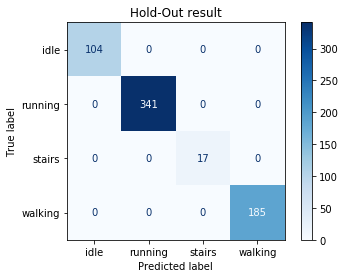

In [62]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_test, preds_test), display_labels=np.unique(y_test)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Hold-Out result')
plt.show()

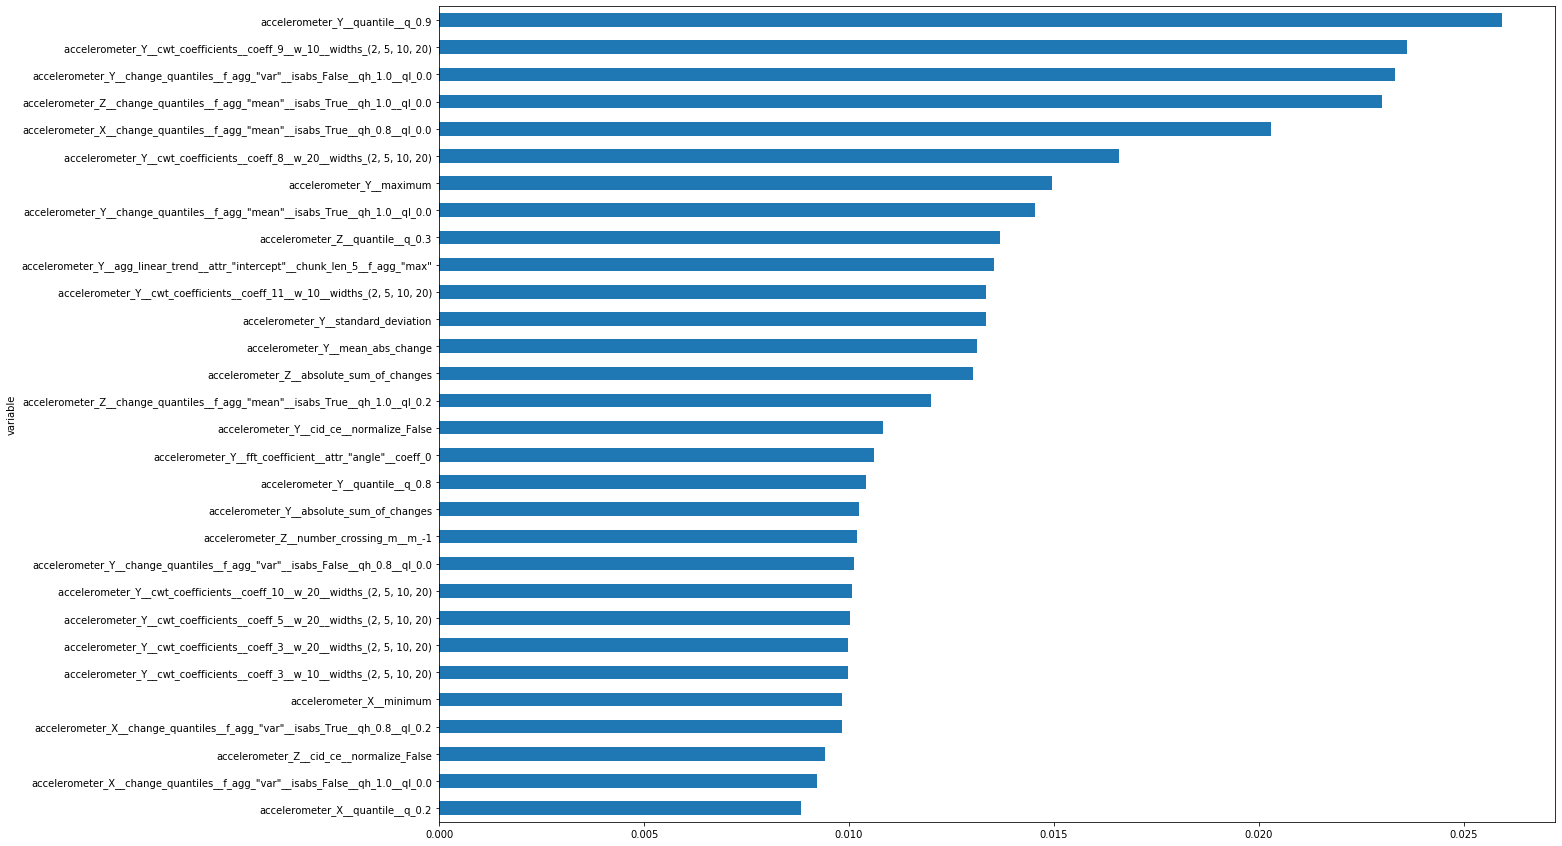

In [63]:
fig, ax = plt.subplots(figsize=(20,15))
feat_importances = pd.Series(classifier_full.feature_importances_, index=X_train_filtered.columns)
feat_importances.nlargest(30)[::-1,].plot(kind='barh', ax=ax)
plt.show()

**Conclusions:**

1. HoldOut dataset the best :-)

## Understanding issue with prediction __stairs__ class on TSNE projection

In [64]:
X_all = X_all_gen[list(relevant_features)].copy()
y_all = X_all_gen.reset_index()['id'].apply(lambda x: x.split('-')[0]).values

np.unique(y_all, return_counts=True), len(X_all), len(y_all)

((array(['idle', 'running', 'stairs', 'walking'], dtype=object),
  array([1039, 3408,  165, 1850])),
 6462,
 6462)

In [65]:
preds_cv = cross_val_predict(RandomForestClassifier(class_weight='balanced', n_jobs=-1), 
                             X_all, y_all, groups=y_all, cv=10, verbose=1)

print(classification_report(y_all, preds_cv, digits=4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        idle     1.0000    1.0000    1.0000      1039
     running     1.0000    1.0000    1.0000      3408
      stairs     0.9821    0.6667    0.7942       165
     walking     0.9711    0.9989    0.9848      1850

    accuracy                         0.9912      6462
   macro avg     0.9883    0.9164    0.9448      6462
weighted avg     0.9913    0.9912    0.9904      6462



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.1s finished


### 2D projection

In [66]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
X_all_scaled = pd.DataFrame(min_max.fit_transform(X_all), columns=X_all.columns)

In [67]:
X_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(X_all_scaled)

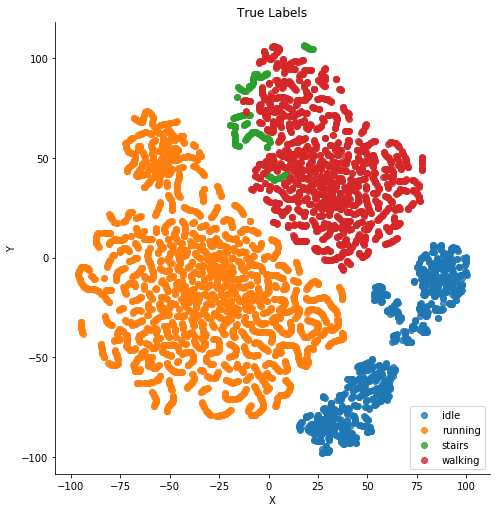

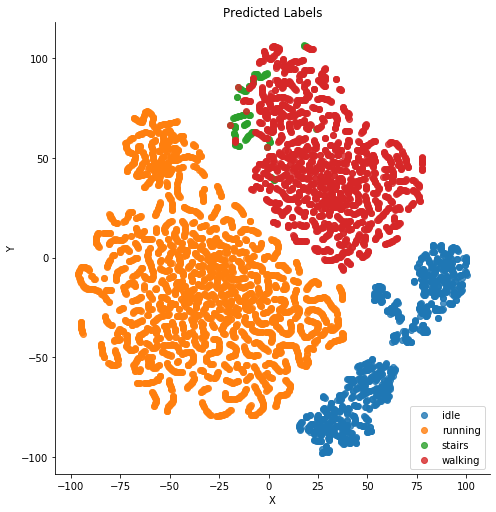

In [68]:
import seaborn as sns

tsne_data = pd.DataFrame(X_embedded, columns=['X', 'Y'])
tsne_data['y_true'] = y_all
tsne_data['y_pred'] = preds_cv
tsne_data['errors'] = y_all != preds_cv

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=tsne_data, fit_reg=False, hue='y_true', legend=False, height=7)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('True Labels')
plt.show()

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=tsne_data, fit_reg=False, hue='y_pred', legend=False, height=7)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('Predicted Labels')
plt.show()

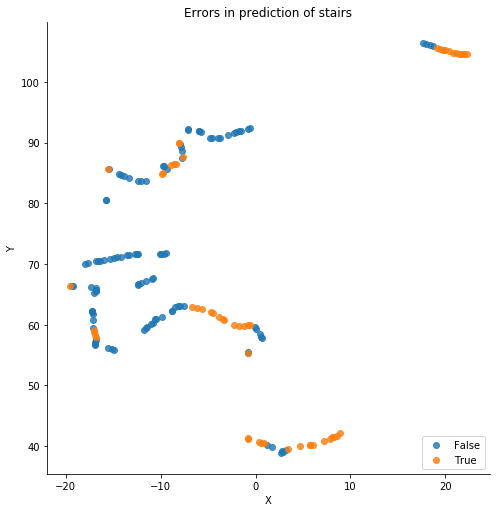

In [69]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=tsne_data.query("y_true == 'stairs'"), fit_reg=False, hue='errors', legend=False, height=7)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('Errors in prediction of stairs')
plt.show()

### 3D projection

In [70]:
X_embedded_3 = TSNE(n_components=3, n_jobs=-1).fit_transform(X_all_scaled)

In [71]:
tsne_data = pd.DataFrame(X_embedded_3, columns=['X', 'Y', 'Z'])
tsne_data['y_true'] = y_all
tsne_data['y_pred'] = preds_cv
tsne_data['errors'] = y_all != preds_cv

tsne_data.head()

,X,Y,Z,y_true,y_pred,errors
0,-18.824606,3.910995,-23.039047,idle,idle,False
1,-5.304838,0.118196,-26.615971,idle,idle,False
2,-13.301016,-2.170203,-34.051609,idle,idle,False
3,-7.489884,-3.300560,-18.993095,idle,idle,False
4,-7.533560,-3.301376,-18.988058,idle,idle,False


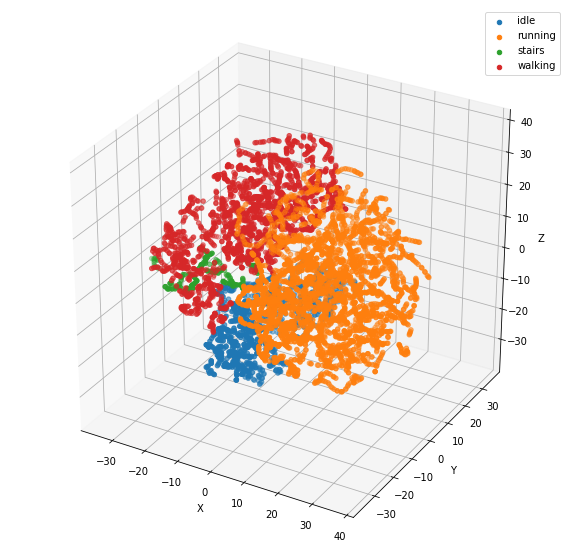

In [72]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(10,10)).gca(projection='3d')
for arg in tsne_data["y_true"].unique():
    ax.scatter(
        xs=tsne_data.loc[tsne_data["y_true"] == arg,"X"], 
        ys=tsne_data.loc[tsne_data["y_true"] == arg,"Y"], 
        zs=tsne_data.loc[tsne_data["y_true"] == arg,"Z"],  
#         c=class_int_dict[arg],
        label=arg,
        cmap='tab10'
    )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

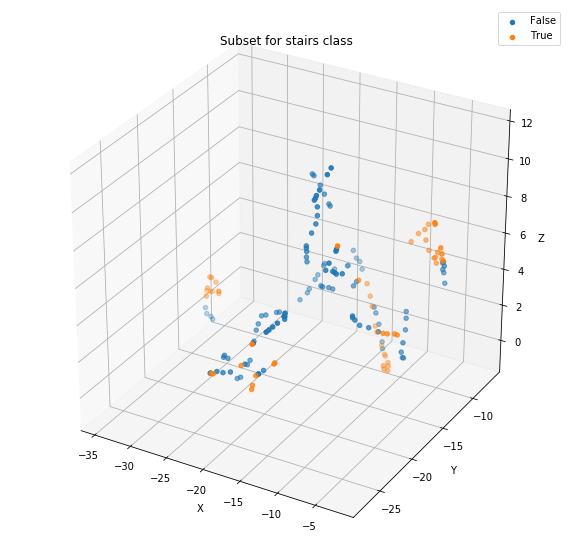

In [73]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
for arg in tsne_data["errors"].unique():
    ax.scatter(
        xs=tsne_data.query("y_true == 'stairs'").loc[tsne_data["errors"] == arg,"X"], 
        ys=tsne_data.query("y_true == 'stairs'").loc[tsne_data["errors"] == arg,"Y"], 
        zs=tsne_data.query("y_true == 'stairs'").loc[tsne_data["errors"] == arg,"Z"],  
#         c=class_int_dict[arg],
        label=arg,
        cmap='tab10'
    )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.title('Subset for stairs class')
plt.show()

In [74]:
preds_cv = cross_val_predict(RandomForestClassifier(class_weight='balanced', n_jobs=-1), 
                             X_embedded_3, y_all, groups=y_all, cv=10, verbose=1)

print(classification_report(y_all, preds_cv, digits=4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        idle     0.9791    0.9913    0.9852      1039
     running     0.9879    0.9853    0.9866      3408
      stairs     0.6309    0.5697    0.5987       165
     walking     0.9452    0.9514    0.9483      1850

    accuracy                         0.9660      6462
   macro avg     0.8858    0.8744    0.8797      6462
weighted avg     0.9652    0.9660    0.9655      6462



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s finished


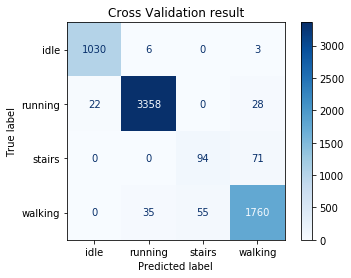

In [75]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_all, preds_cv), display_labels=np.unique(y_all)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Cross Validation result')
plt.show()

**Conclusions:**
1. Based on visualizations and errors of baseline model, let's try more smart model with tuning parameters.

# Fit and tune XGBoost model

In [126]:
y_train_int = [class_int_dict[arg] for arg in y_train]
y_test_int = [class_int_dict[arg] for arg in y_test]

def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

largest_class_weight_coef = max(y_train_int)/len(y_train_int)
    
#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train_int, largest_class_weight_coef)
weight[:5]

[1.554812834224599,
 1.554812834224599,
 1.554812834224599,
 1.554812834224599,
 1.554812834224599]

In [130]:
from hyperopt.pyll import scope

from sklearn.model_selection import (cross_val_score, train_test_split,
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.feature_selection import VarianceThreshold
import xgboost as xgb

import os
import logging
# Let OpenMP use 4 threads to evaluate models - may run into errors
# if this is not set. Should be set before hyperopt import.
os.environ['OMP_NUM_THREADS'] = '20'

import hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# -----------------------------------------------------
#                       SETUP
# -----------------------------------------------------

SEED = 42  # Fix the random state to the ultimate answer in life.
# Initialize logger
#logging.basicConfig(filename="xgb_hyperopt.log", level=print)


# -----------------------------------------------------
#                       HYPEROPT
# -----------------------------------------------------

def score(params):
    print("Training with params: ")
    print(params)
    # Delete 'n_estimators' because it's only a constructor param
    # when you're using  XGB's sklearn API.
    # Instead, we have to save 'n_estimators' (# of boosting rounds)
    # to xgb.cv().
    
    num_boost_round = int(params['n_estimators'])
    del params['n_estimators']

    
    
    dtrain = xgb.DMatrix(X_train_filtered.values, 
                         label = y_train_int, weight=weight)


    score_history = xgb.cv(params, dtrain, num_boost_round,
                           nfold=5, stratified=True,
                           early_stopping_rounds=30,
                           verbose_eval=100)
    # Only use scores from the final boosting round since that's the one
    # that performed the best.
#     print(score_history.columns)
    mean_final_round = score_history['test-mlogloss-mean'].values[-1]
#     std_final_round = score_history['test-rmse-std'].values[-1]
    print("\tMean Score: {0}\n".format(mean_final_round))
#     print("\tStd Dev: {0}\n\n".format(std_final_round))
    # score() needs to return the loss (1 - score)
    # since optimize() should be finding the minimum, and AUC
    # naturally finds the maximum.
    #loss = 1 - mean_final_round
    return {'loss': mean_final_round, 'status': STATUS_OK}


def optimize(
    # trials,
        random_state=SEED):
    """
    This is the optimization function that given a space (space here) of
    hyperparameters and a scoring function (score here),
    finds the best hyperparameters.
    """

    space = {
        'n_estimators': scope.int(hp.quniform('n_estimators', 50, 4000, 5)),
        'eta': hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  scope.int(hp.choice('max_depth', np.arange(3, 10, dtype=int))),
        'min_child_weight': scope.int(hp.quniform('min_child_weight', 1, 10, 1)),
        'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.quniform('gamma', 0, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.quniform('alpha', 0, 10, 1),
        'lambda': hp.quniform('lambda', 1, 2, 0.1),
        'booster': 'gbtree',
        'tree_method': 'hist',
        'seed': random_state,        
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class':4,
        'n_jobs': 20,
        'nthread' : 20,
            }
    
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest,
                # trials=trials,
                max_evals=30)
    return best


best_hyperparams = optimize(
    # trials
)
print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

Training with params:                                 
{'alpha': 9.0, 'booster': 'gbtree', 'colsample_bytree': 0.75, 'eta': 0.2, 'eval_metric': 'mlogloss', 'gamma': 0.6000000000000001, 'lambda': 1.3, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 655, 'n_jobs': 20, 'nthread': 20, 'num_class': 4, 'objective': 'multi:softprob', 'seed': 42, 'subsample': 0.9, 'tree_method': 'hist'}
[0]	train-mlogloss:1.03726+0.00178	test-mlogloss:1.04750+0.00246

[100]	train-mlogloss:0.01852+0.00012	test-mlogloss:0.03202+0.00763

[200]	train-mlogloss:0.01833+0.00013	test-mlogloss:0.03169+0.00774

[300]	train-mlogloss:0.01811+0.00020	test-mlogloss:0.03136+0.00763

	Mean Score: 0.0313558                                

Training with params:                                                  
{'alpha': 4.0, 'booster': 'gbtree', 'colsample_bytree': 0.75, 'eta': 0.1, 'eval_metric': 'mlogloss', 'gamma': 0.9, 'lambda': 1.4000000000000001, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 3225, 'n_job

[0]	train-mlogloss:1.33843+0.00012	test-mlogloss:1.33979+0.00048                   

[100]	train-mlogloss:0.10238+0.00047	test-mlogloss:0.12589+0.00745                 

[200]	train-mlogloss:0.01798+0.00004	test-mlogloss:0.03268+0.00907                 

[300]	train-mlogloss:0.00971+0.00006	test-mlogloss:0.02259+0.00937                 

[400]	train-mlogloss:0.00931+0.00006	test-mlogloss:0.02201+0.00939                 

[500]	train-mlogloss:0.00919+0.00005	test-mlogloss:0.02182+0.00940                 

[600]	train-mlogloss:0.00914+0.00005	test-mlogloss:0.02175+0.00940                 

[700]	train-mlogloss:0.00911+0.00004	test-mlogloss:0.02172+0.00939                 

[800]	train-mlogloss:0.00910+0.00005	test-mlogloss:0.02169+0.00939                 

[900]	train-mlogloss:0.00910+0.00005	test-mlogloss:0.02169+0.00939                 

	Mean Score: 0.021690000000000004                                                  

Training with params:                                            

[0]	train-mlogloss:1.15725+0.00103	test-mlogloss:1.16806+0.00559                   

[100]	train-mlogloss:0.00904+0.00007	test-mlogloss:0.02077+0.00857                 

[200]	train-mlogloss:0.00878+0.00006	test-mlogloss:0.02035+0.00850                 

	Mean Score: 0.020340800000000003                                                  

Training with params:                                                              
{'alpha': 4.0, 'booster': 'gbtree', 'colsample_bytree': 1.0, 'eta': 0.125, 'eval_metric': 'mlogloss', 'gamma': 0.65, 'lambda': 1.0, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 435, 'n_jobs': 20, 'nthread': 20, 'num_class': 4, 'objective': 'multi:softprob', 'seed': 42, 'subsample': 0.75, 'tree_method': 'hist'}
[0]	train-mlogloss:1.16285+0.00237	test-mlogloss:1.17212+0.00546                   

[100]	train-mlogloss:0.01257+0.00006	test-mlogloss:0.02431+0.00724                 

[200]	train-mlogloss:0.01213+0.00019	test-mlogloss:0.02354+0.00729                 


	Mean Score: 0.008246999999999999                                                  

100%|██████████| 30/30 [34:41<00:00, 69.38s/trial, best loss: 0.008246999999999999]
The best hyperparameters are:  

{'alpha': 0.0, 'colsample_bytree': 0.8500000000000001, 'eta': 0.17500000000000002, 'gamma': 0.25, 'lambda': 1.6, 'max_depth': 0, 'min_child_weight': 2.0, 'n_estimators': 970.0, 'subsample': 1.0}


In [132]:
params = {'alpha': 0.0, 'booster': 'gbtree', 'colsample_bytree': 0.8500000000000001, 'eta': 0.17500000000000002, 'eval_metric': 'mlogloss', 'gamma': 0.25, 'lambda': 1.6, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 970, 'n_jobs': 20, 'nthread': 20, 'num_class': 4, 'objective': 'multi:softprob', 'seed': 42, 'subsample': 1.0, 'tree_method': 'hist'}
num_boost_round = int(params['n_estimators']) * 3
del params['n_estimators']



dtrain = xgb.DMatrix(X_train_filtered.values, 
                     label = y_train_int, weight=weight)


score_history = xgb.cv(params, dtrain, num_boost_round,
                       nfold=10, stratified=True,
                       early_stopping_rounds=50,
                       verbose_eval=10, )

[0]	train-mlogloss:1.06943+0.00074	test-mlogloss:1.07533+0.00493
[10]	train-mlogloss:0.16503+0.00096	test-mlogloss:0.18147+0.01567
[20]	train-mlogloss:0.03491+0.00050	test-mlogloss:0.04624+0.01106
[30]	train-mlogloss:0.00941+0.00019	test-mlogloss:0.01586+0.00669
[40]	train-mlogloss:0.00394+0.00008	test-mlogloss:0.00854+0.00594
[50]	train-mlogloss:0.00263+0.00003	test-mlogloss:0.00662+0.00540
[60]	train-mlogloss:0.00225+0.00002	test-mlogloss:0.00603+0.00543
[70]	train-mlogloss:0.00209+0.00003	test-mlogloss:0.00572+0.00517
[80]	train-mlogloss:0.00202+0.00004	test-mlogloss:0.00556+0.00495
[90]	train-mlogloss:0.00202+0.00004	test-mlogloss:0.00554+0.00494
[100]	train-mlogloss:0.00202+0.00004	test-mlogloss:0.00553+0.00494
[110]	train-mlogloss:0.00202+0.00004	test-mlogloss:0.00553+0.00494
[120]	train-mlogloss:0.00202+0.00004	test-mlogloss:0.00553+0.00494
[130]	train-mlogloss:0.00202+0.00004	test-mlogloss:0.00553+0.00494
[140]	train-mlogloss:0.00201+0.00004	test-mlogloss:0.00552+0.00494
[150]	

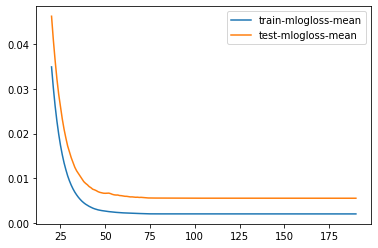

In [134]:
score_history.loc[20:, ['train-mlogloss-mean','test-mlogloss-mean']].plot()

In [135]:
cls = xgb.XGBClassifier(params, n_estimators=110)
preds_cv = cross_val_predict(cls, 
                             X_train_filtered, y_train, groups=y_train, cv=10, verbose=1)

print(classification_report(y_train, preds_cv, digits=4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        idle     0.9979    1.0000    0.9989       935
     running     1.0000    1.0000    1.0000      3067
      stairs     0.7937    0.6757    0.7299       148
     walking     0.9715    0.9832    0.9773      1665

    accuracy                         0.9869      5815
   macro avg     0.9408    0.9147    0.9265      5815
weighted avg     0.9862    0.9869    0.9865      5815



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.5s finished


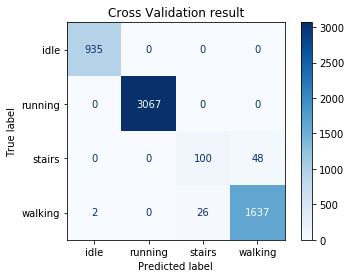

In [136]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_train, preds_cv), display_labels=np.unique(y_train)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Cross Validation result')
plt.show()

In [137]:
classifier_full = xgb.XGBClassifier(params, n_estimators=230)
classifier_full.fit(X_train_filtered, y_train)
preds_test = classifier_full.predict(X_test_filtered)

print(classification_report(y_test, preds_test, digits=4))

              precision    recall  f1-score   support

        idle     1.0000    1.0000    1.0000       104
     running     1.0000    1.0000    1.0000       341
      stairs     1.0000    1.0000    1.0000        17
     walking     1.0000    1.0000    1.0000       185

    accuracy                         1.0000       647
   macro avg     1.0000    1.0000    1.0000       647
weighted avg     1.0000    1.0000    1.0000       647



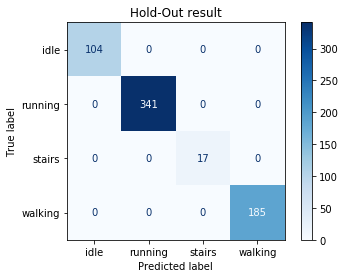

In [138]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix(y_test, preds_test), display_labels=np.unique(y_test)
                      ).plot(cmap=plt.cm.Blues,
                             values_format='.0f',
                            ax=ax)
ax.set_title('Hold-Out result')
plt.show()

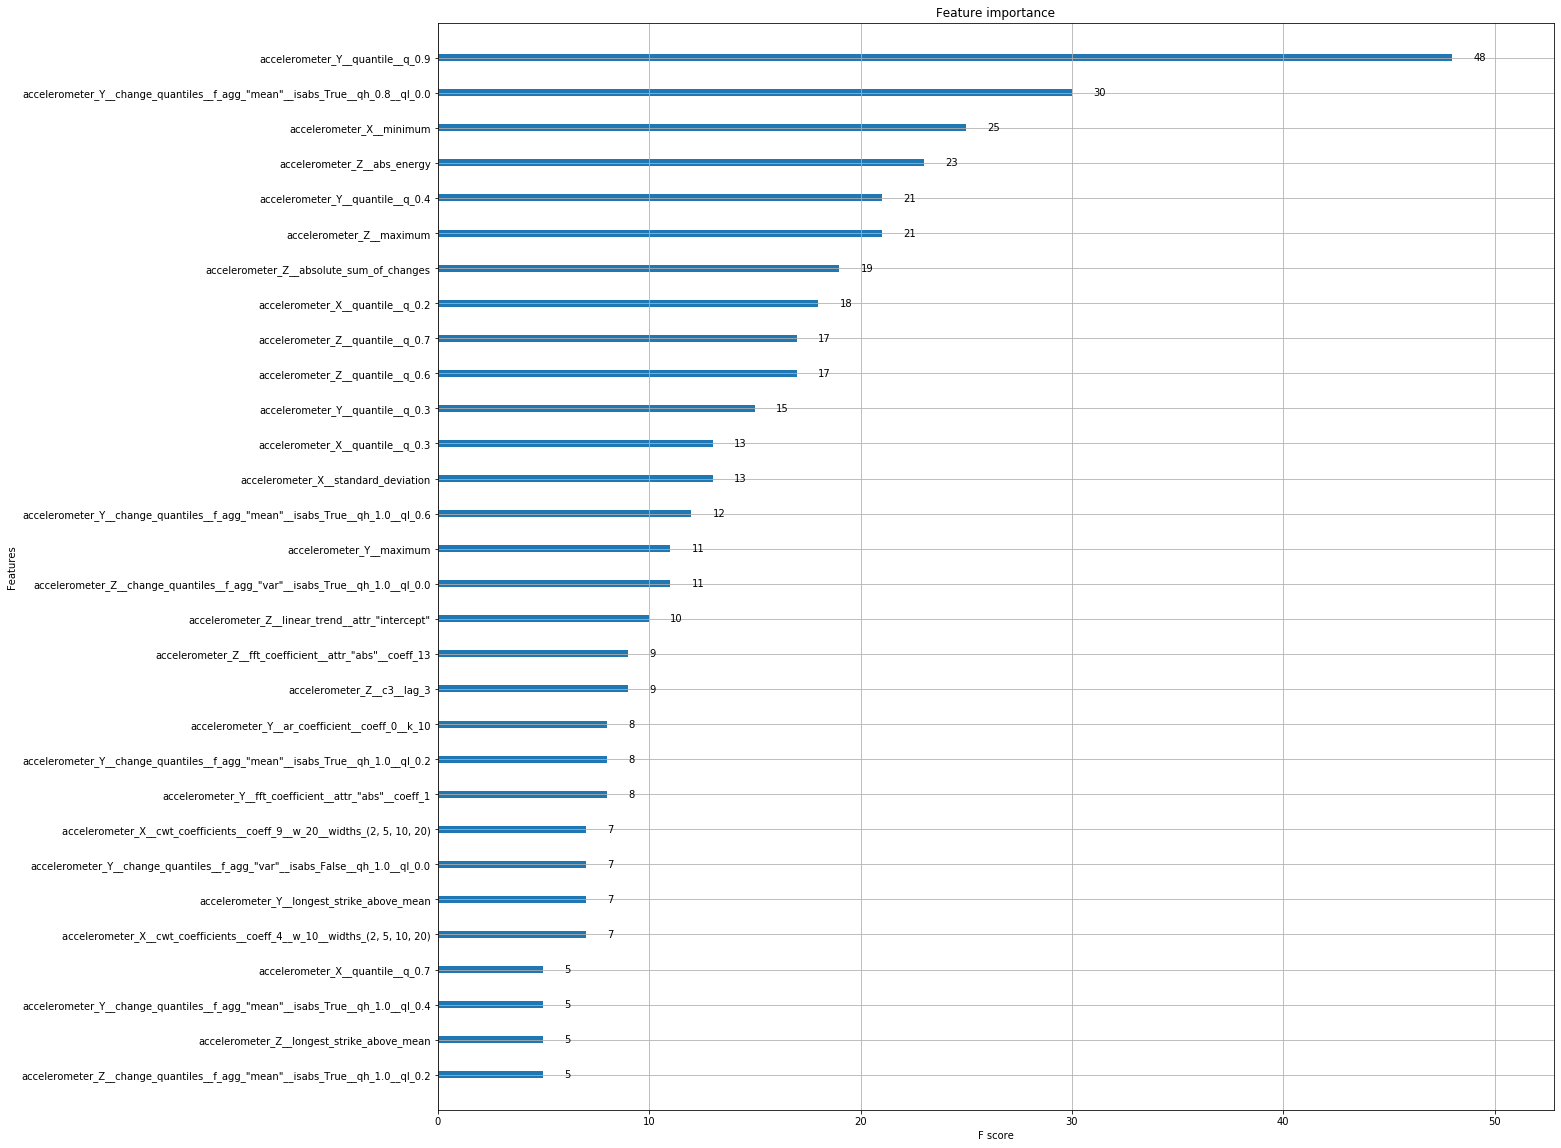

In [139]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
xgb.plot_importance(classifier_full, max_num_features=30, ax=ax)
plt.show()

In [140]:
classifier_full.save_model('xgb_classifier.model')

# Conclusions

## Data Analysis

Data is clear, without NA's. I think measurements were maybe scaled before. Types of activity are unbalanced and we have a small "stairs" class. 

## Validation results

1. I defined a random holdout subset with a 10% size of all data. 
2. 90% of data I used for training and checking model with cross-validation (5 or 10 folds).
3. This scheme is optimal for tuning a model based on cross-validation results and check on holdout data.

## Modelling

1. I tested two baselines model (Random Forest with default parameters) on different features sets,  it gives 99% of accuracy with an issue with stairs class.
2. For a better understanding issue with stairs class, I use TSNE projection and based on 3d and 2D visualization, I think we can have the next reasons:
 - data labeled with errors
 - stairs activity is so close to walking and it's hard to predict based only on accelerometer data.
 - we should collect more data for the stairs class.
3. Oversampling or undersampling isn't helpful in this situation, because stairs examples are so close to walking. Models were fitted with weights and this is enough.
4. All models are the best on holdout data, but we have errors on cross-validation on the training part. Better to recreate the holdout subset.

## Next steps

1. Apply metric learning to prepare vector representation in some latent space and use this with some classifiers.
2. Deeper data analysis for a better understanding of the difference between stairs and walking.
3. Retrain model based on the real importance of classes (can be discussed) and prepare inference of the best model :-)